# MNIST NUMBER

In [1]:
#Importing the datasets
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784' , version=1)


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
#Storing the pixel values in x and the accepected number in y
x = mnist["data"]
y = mnist["target"]

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Here we can conclude that there are 7000 images and each image has 784 features.

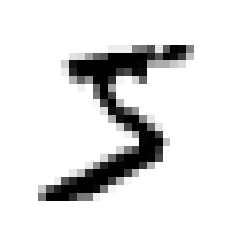

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [7]:
y[0]

'5'

In [8]:
#Conversion of target into int
y = y.astype('int')

In [9]:
#Mnist dataset is alraedy split it into test and train we have to omly alot the values.
x_train , x_test, y_train, y_test = x[:60000] , x[60000:] , y[:60000],y[60000:]

In [10]:
#First we will try to classify only one digit by binary classifier
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

# Trainning the binary classifier

In [11]:
#A Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train , y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([x[0]])

array([ True])

# Performance Measures

## Cross-Validation

In [13]:
#Measuring the accuracy using crossvalidation score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , x_train , y_train_5, cv=3, scoring="accuracy") #we are splitting the trainning set into 3 folds

array([0.96045, 0.96505, 0.9478 ])

In this case the accuracy is so high beacuse only 10% of the image is actually 0 so if we are not guessing o then 90% of time the classifier is correct.

## Confusion Matrix

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , x_train , y_train_5 , cv=3)

In [15]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
binary_cm = confusion_matrix(y_train_5 , y_train_pred)
binary_cm

array([[52818,  1761],
       [  979,  4442]], dtype=int64)

## Precision And Recall 

In [16]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.7161051104304369

In [17]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.8194060136506179

In [18]:
#F_1 Score
from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_pred)

0.7642807983482449

In [19]:
#Getting the y_scores
y_scores = cross_val_predict(sgd_clf , x_train , y_train_5 , cv=3 , method="decision_function")

In [20]:
y_scores

array([  3850.26524718, -22623.64839175, -39401.56833237, ...,
         5184.01649121,  -9626.56180572, -17138.07050181])

## ROC

In [21]:
#Computing TPR and FPR
from sklearn.metrics import roc_curve
fpr , tpr, thresholds = roc_curve(y_train_5 , y_scores)


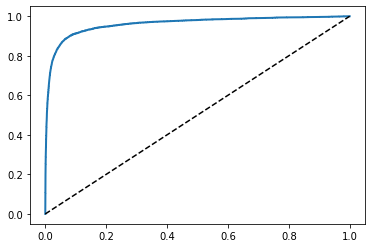

In [22]:
#Plotting ROC curve
def plot_roc_curve(fpr , tpr , label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1]  , [0,1], 'k--')
plot_roc_curve(fpr,tpr)
plt.show()

In [23]:
#Calculating the area under roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5 , y_scores)

0.9602484323337116

## Random Forest Classifier

In [24]:
#Appling feature scalling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [25]:
#Fitting the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=0)
y_probab_forest = cross_val_predict(forest_clf , x_train, y_train_5 , cv=3, method="predict_proba")

In [26]:
y_scores_forest = y_probab_forest[: ,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

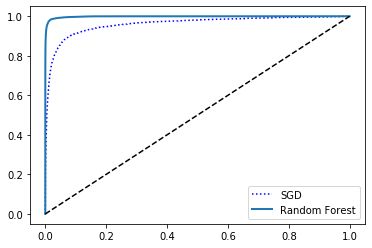

In [27]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [28]:
#Calculating the area under curve
roc_auc_score(y_train_5, y_scores_forest)

0.9983187688461714

# Multiclass Classification

In [ ]:
#Fitting the SVM model
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train , y_train)


In [30]:
#Predicting the test result 
y_svm_pred = svm_clf.predict(x_test)
y_svm_pred


array([7, 2, 1, ..., 4, 5, 6])

In [31]:
#Making of confusion matrix
cm_svm = confusion_matrix(y_test, y_svm_pred)
cm_svm

array([[ 967,    0,    2,    1,    0,    3,    3,    2,    2,    0],
       [   0, 1125,    5,    0,    0,    1,    2,    0,    2,    0],
       [   5,    1,  996,    2,    2,    0,    1,   15,    9,    1],
       [   0,    0,    3,  980,    1,    7,    0,   12,    7,    0],
       [   0,    0,   13,    0,  945,    2,    3,    7,    2,   10],
       [   2,    0,    2,   11,    1,  857,    6,    5,    6,    2],
       [   6,    2,    0,    0,    4,    8,  927,    6,    5,    0],
       [   1,    6,   13,    3,    3,    0,    0,  989,    0,   13],
       [   3,    0,    6,    5,    6,   10,    3,   12,  926,    3],
       [   4,    5,    6,   11,   13,    2,    0,   21,    3,  944]],
      dtype=int64)

In [32]:
#Predicting the accuraccy score
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, y_svm_pred , normalize=True)
print("Accuracy: %.2f%%" % (acc_svm * 100.0))

Accuracy: 96.56%


In [33]:
#Fitting logistic regression to the trainning set
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train,y_train)

C:\Users\SONALI KUMARI\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Predicting the test set result
y_log_pred = log_classifier.predict(x_test)
y_log_pred

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test,y_log_pred)
cm_log

array([[ 954,    0,    2,    2,    2,   10,    6,    2,    2,    0],
       [   0, 1110,    7,    2,    0,    2,    3,    1,   10,    0],
       [   9,   12,  924,   17,   10,    4,   12,    8,   33,    3],
       [   4,    1,   18,  922,    3,   25,    2,   11,   18,    6],
       [   1,    3,    8,    3,  913,    1,    8,    8,    6,   31],
       [   9,    5,    3,   28,    9,  781,   15,    8,   30,    4],
       [   9,    4,    9,    4,    7,   19,  902,    1,    3,    0],
       [   2,    8,   22,    7,    6,    2,    0,  947,    3,   31],
       [   9,   12,    4,   23,    8,   27,    9,   11,  856,   15],
       [   6,    7,    2,   10,   22,    8,    0,   24,    7,  923]],
      dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, y_log_pred , normalize=True)
print("Accuracy: %.2f%%" % (acc_log * 100.0))

Accuracy: 92.32%


In [2]:
#Fitting the KNN to the trainning set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski' , p=2)
knn_classifier.fit(x_train , y_train)

NameError: name 'x_train' is not defined

In [1]:
#Predicting the test result
y_knn_pred = knn_classifier.predict(x_test)
y_knn_pred

NameError: name 'knn_classifier' is not defined

In [ ]:
#Making of confusion matrix
cm_knn = confusion_matrix(y_test, y_knn_pred)
cm_knn